In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import pandas as pd 
import math 
import random 

PCA(n_components=2)


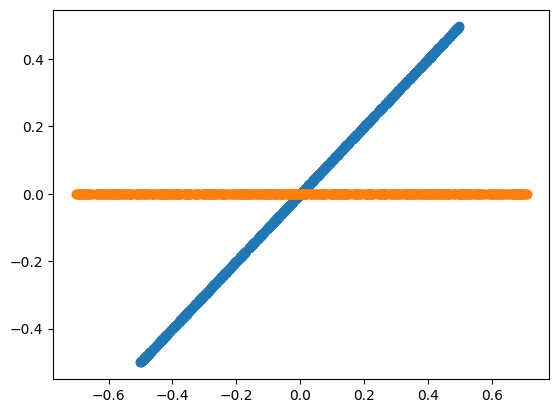

In [21]:
np.random.seed(1)
n = 1 # the amount of the correlation 
x = np.random.uniform(1,2,1000) # generate 1000 samples from a uniform random variable
y = x.copy() * n

# PCA works better if the data is centered
x = x - np.mean(x) # center x. remove its mean from the data 
y = y - np.mean(y) # center y. remove its mean from the data 


data = pd.DataFrame({'x':x, 'y':y}) # create a datframe with x and y 

plt.scatter(data.x, data.y) # plt the original corellated data in blue 

pca = PCA(n_components=2) #instantiate a PCA. Chose to hget 2 output variables 

# Create the transformation model for this data. INternally, it gets the rotation matrix and the explained variance 
pcaTr = pca.fit(data)

print(pcaTr)

rotatedData = pcaTr.transform(data) 

dataPCA = pd.DataFrame(data=rotatedData, columns=['PC1', 'PC2'])

# plot the transformed dta in orange 
plt.scatter(dataPCA.PC1,dataPCA.PC2)
plt.show()





# Understanding the transformation model pcaTr

In [23]:
print('Eigenvecotes or principal component: First row must be in the direction of [1,n]')
print(pcaTr.components_)
print()

print('Eignevalues or explained variance ')
print(pcaTr.explained_variance_)

Eigenvecotes or principal component: First row must be in the direction of [1,n]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eignevalues or explained variance 
[1.66465230e-01 2.08930963e-34]


angle:  45.0
rotation matrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


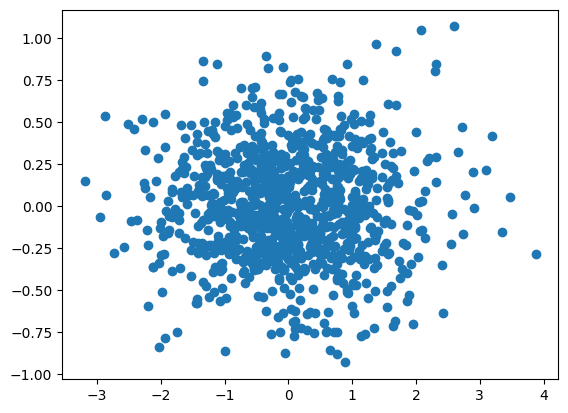

In [36]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

np.random.seed(100)

std1 = 1
std2 = 0.33

x = np.random.normal(0,std1, 1000)
y = np.random.normal(0,std2, 1000)

# y = y + np.random.normal(0,1,1000) * noiselevel * np.sin(0.78)

# PCA works better if the data is centered 
x = x- np.mean(x) # center x
y = y -np.mean(y)


plt.scatter(x,y)

# Define a pair of dependent variables with a desired amount of covariance 
n = 1 # magnituded of covariance . 
angle = np.arctan(1/n) # convert the covrainace to and angle

print('angle: ', angle * 180 /math.pi)

# create a rotation matrix using the given angle 

rotationMatrix = np.array([[np.cos(angle), np.sin(angle)]
                           ,
                           [-np.sin(angle), np.cos(angle)]])

print('rotation matrix')
print(rotationMatrix)

xy = np.concatenate(([x],[y]), axis=0).T # Create a matrix with column x and column y 


#Transform the data using the rotation matrix. It corelates the two variables 
data = np.dot(xy, rotationMatrix) # return a nD array 

# print the rotated data 
# plt.scatter(data[:,0], data[:,1])
# plt.show()


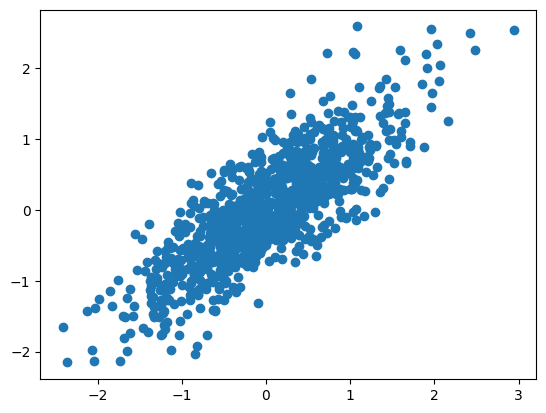

In [34]:
plt.scatter(data[:,0], data[:,1])
plt.show()

Let us print the original and the resulting transformed system using the result ofthe PCA in the same plot alongside with the 2 Principal COmponent vectors in red andblue 

Eigenvectors or principal component: First row must be in the direction of [1,n]
[[ 0.70826362  0.70594805]
 [-0.70594805  0.70826362]]

Eigenvalues or explained variance
[1.09488451 0.11041569]


C:\Users\ishan\AppData\Local\Temp\ipykernel_2440\2300212788.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,rotationMatrix[0][0]*std1*3], [0,rotationMatrix[0][1] * std1 * 3] , 'k-', color ='red')
C:\Users\ishan\AppData\Local\Temp\ipykernel_2440\2300212788.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')


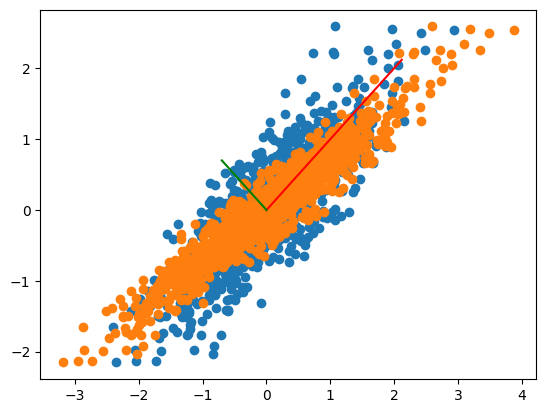

In [42]:
plt.scatter(data[:,0], data[:,1]) # print the original data in blue 

# Apply PCA in theory the EIgnevector Matrix must be the 
# inverse  of the original matrix 
pca = PCA(n_components=2) # instantiate the PCA. choose to get 2 output variables

# create the transfomation model for this data. Internally it gets the rotation
pcaTr = pca.fit(data)

dataPCA = pcaTr.transform(data)
print("Eigenvectors or principal component: First row must be in the direction of [1,n]")

print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

# print the rotated data 
plt.scatter(dataPCA[:,0], data[:,1])

# plot the first component axe. use the explained variance to scale the vector
plt.plot([0,rotationMatrix[0][0]*std1*3], [0,rotationMatrix[0][1] * std1 * 3] , 'k-', color ='red')
# plot the second component axe. use the explained variance to scale the vector
plt.plot([0,rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')

plt.show()

# PCA for dimensionality Reduction

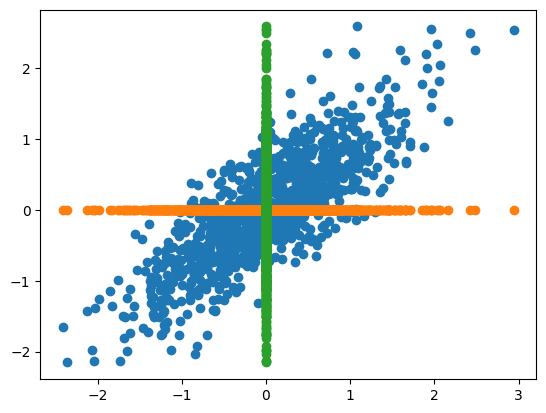

In [43]:
npoints = len(data)

# plot the orginal data in blue 
plt.scatter(data[:,0], data[:,1])

#plot the projection along the first component in orange 
plt.scatter(data[:,0], np.zeros(npoints))

# plot the projection along the second component 
plt.scatter(np.zeros(npoints), data[:,1])

plt.show()

# PCA as  a strategy to plot complex data 
The next chart shows a sample diagram displaying a dataset of pictures of cats and dogs. Raw pictures are composed of hundreds or even thousands of features. However, PCA allows us to reduce theat many features to onaly two. Inthat reduced space of uncorrelated variables, we can easily separate cats and dogs. 
